In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas as pd
#from math import exp
# import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Problem 1 - Poisson spike trains

In [0]:
plt.style.use('ggplot')
fig_width = 8 # width in inches
fig_height = 6 # height in inches
fig_size = [fig_width,fig_height]
plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 14#9
plt.rcParams['legend.fontsize'] = 11#7.
sns.set(style = 'whitegrid',context = 'notebook', palette = 'dark')

## (a)
In many neurons of the brain, the omission of individual spikes appears to occur almost at
random, similar to the clicks in a Geiger counter. We will therefore start by creating some artificial,
random spike trains. We will quantify such a spike train as a series of 0s (no spikes) and 1s (spike).
To begin, create a vector of 1000 elements so that, on average but in the most irregular manner, every
fourth element in the vector is a spike. Plot the vector, by using one dot for each spike, for example,
or the matplotlib function ’eventplot’

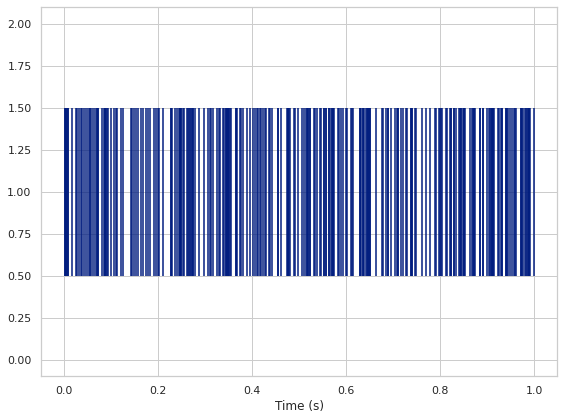

260

In [3]:
spks = np.random.choice([0, 1], size=(1000,), p=[0.75, 0.25])
time = np.linspace(0,1, len(spks)) # unit in s
plt.eventplot(time[spks == 1])
plt.xlabel('Time (s)')
plt.savefig('fig1.report3.png', dpi = 600)
plt.show()

np.sum(spks)

## (b)
 In the next step, we want to introduce time units. We will associate every 0 or 1 with a time
bin of length $∆t$ msec. Choose $∆t = 2$ msec and create a spike train of length 1 sec with an average
rate of 25 spikes/sec. (Careful with the units!) Plot the spike train similar to above, but now use the
correct time axis.

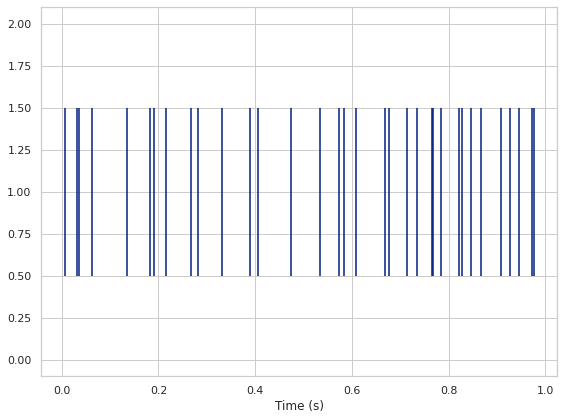

34

In [4]:
delta_t = 2 #unit in ms
spks = np.random.choice([0, 1], size=(int(1000/delta_t),), p=[0.95, 0.05])
time = np.linspace(0,1, len(spks)) # unit in s
plt.eventplot(time[spks == 1])
plt.xlabel('Time (s)')
plt.savefig('fig2.report3.png', dpi = 600)
plt.show()
np.sum(spks)

## (c)
Generate N = 200 spike trains with firing rate 25 Hz and count the total number of spikes in
each of them. Plot 50 of these trials as a rastergram. Plot a histogram of the spike counts


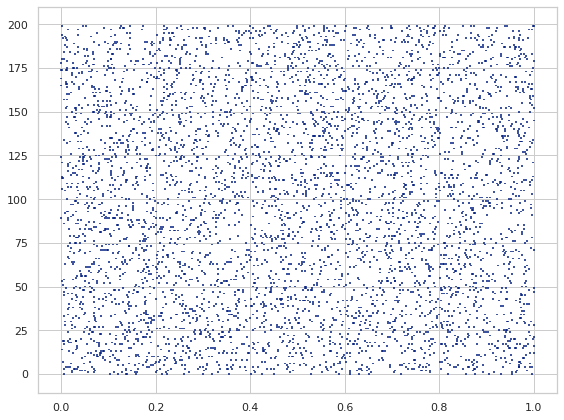

In [25]:
spk_trains1 = np.random.choice([0, 1], size=(int(1000/delta_t),), p=[0.95, 0.05])
time = np.linspace(0,1, len(spk_trains1))

time_spk1 = [time[spk_trains1==1]]


for i in range(1, 200):
    spk_i = np.random.choice([0, 1],  size=(int(1000/delta_t), ), p=[0.95, 0.05])
    spk_trains1 = np.vstack((spk_trains1,spk_i))
    time_spk1.append(time[spk_i!=0])

plt.eventplot(time_spk1)
plt.savefig('fig3.report3.png', dpi = 600)
plt.show()

In [0]:
spk_trains = np.random.choice([0, 1], size=(int(1000/delta_t),), p=[0.95, 0.05])
time = np.linspace(0,1, len(spk_trains))

time_spk = [time[spk_trains==1]]


for i in range(1, 100000):
    spk_i = np.random.choice([0, 1],  size=(int(1000/delta_t), ), p=[0.95, 0.05])
    spk_trains = np.vstack((spk_trains,spk_i))
    time_spk.append(time[spk_i!=0])

# plt.eventplot(time_spk)
# plt.show()

25.01704


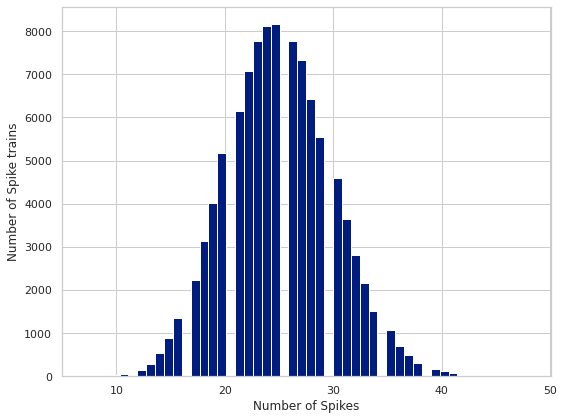

In [24]:
sum_spks = np.sum(spk_trains, axis = 1)
print(np.mean(sum_spks))
plt.hist(sum_spks, bins = 50)
plt.xlabel('Number of Spikes')
plt.ylabel('Number of Spike trains')
plt.savefig('fig4.report3.png', dpi = 600)
plt.show()

(d) Advanced